# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

<span style="color:lightblue"> **Pro's and Con's of the Representations:**

As we saw in last week's HW comparing graphs, the histogram shows us the distribution of the data clearly and helps us see overall skewness. So, that's a definite pro. The cons of histograms is that we don't see outliers as clearly - as in the box plot. Also, we know that the bin width can affect interpretation, so I think that value should be adjusted and "played with" to see if the representation can be improved. I also think it's telling that we have had to specify the 75th percentile for the histogram as a data output, because that concept is more easily identified visually with the box plot. Another pro for the box plot is we have the median clearly shown as a line. 

<span style="color:lightblue"> **Choosing a representation:**

To answer this question, we have to consider the statement "how much the more expensive drugs tend to cost, in the context of the other prices." and interpret as the pharmacy wants to see the overall magnitude of the higher price medications vs the other prices. So, this means we need to look at the interquartile range and we can see the 75th precentile easily on the box plot.

<span style="color:lightblue"> **Improvements:**

- Both graphs need a clear title to tell us what they are measuring
- The histogram needs its axes labled better: x: Price of Drugs y: Frequency. Also the legend should say "Prices" instead of "data"
- We could also use a visual element to show the 75% percentile using plt.axvline for the histogram
- For the box plot, we could show percentile vales as notes in the graph


In [14]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

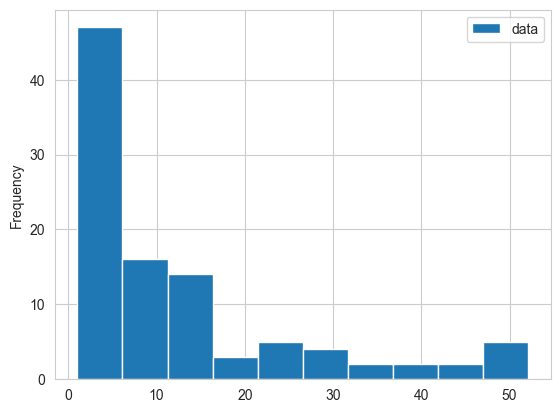

In [15]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

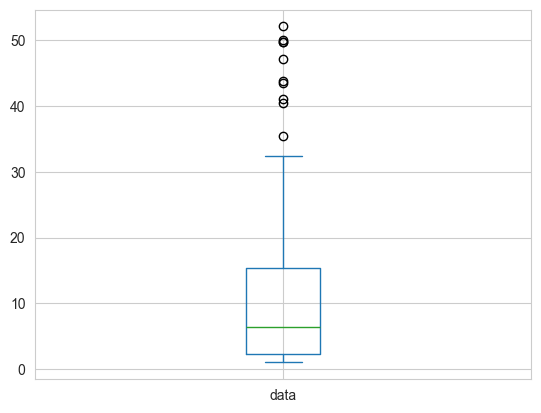

In [16]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

<span style="color:lightblue"> CONCLUSIONS

This data is useable, however, I can't see obvious feature-target correlations based on my viewing. This tells me that there aren't easily-identifiable individual features that correspond to fraud. Rather, I believe that certain combinations of feature values will yield patterns of fraud. However, I think that investigation is outside the scope of this particular exercise. 


<span style="color:lightblue"> DETAILS

- Most of the numerical data is either normally or evenly distributed. However, there are some exceptions with categorical data being skewed. 
- There are some outliers present, but becuase most of the data is presented as categorical data, the outliers are quite limited. For example, Car Price has ranges of prices and most of the data is in one or two categories. So, the values are in bins of categories. If this feature had an actual car price in dollars, I think we'd see more outliers and a distribution of values. 
- Bin sizes most certainly affected outcomes. In particular, I had a hard time trying to get cases/year to yield a readable plot, so I removed that from the other calculations and handled it on its own. This is because there are only a few years worth of data and the other features have many more unique entries. 

In [17]:
#Prepping code: set the libraries, get the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#get the data to be used
car_claims = pd.read_csv(r"C:\Users\james\OneDrive\Documents\James at BU\Homework\699-ModB2-Spring\699 Datasets\carclaims.csv")
print("\nColumns:", car_claims.columns)


Columns: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')


Numerical columns: Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Year'],
      dtype='object')


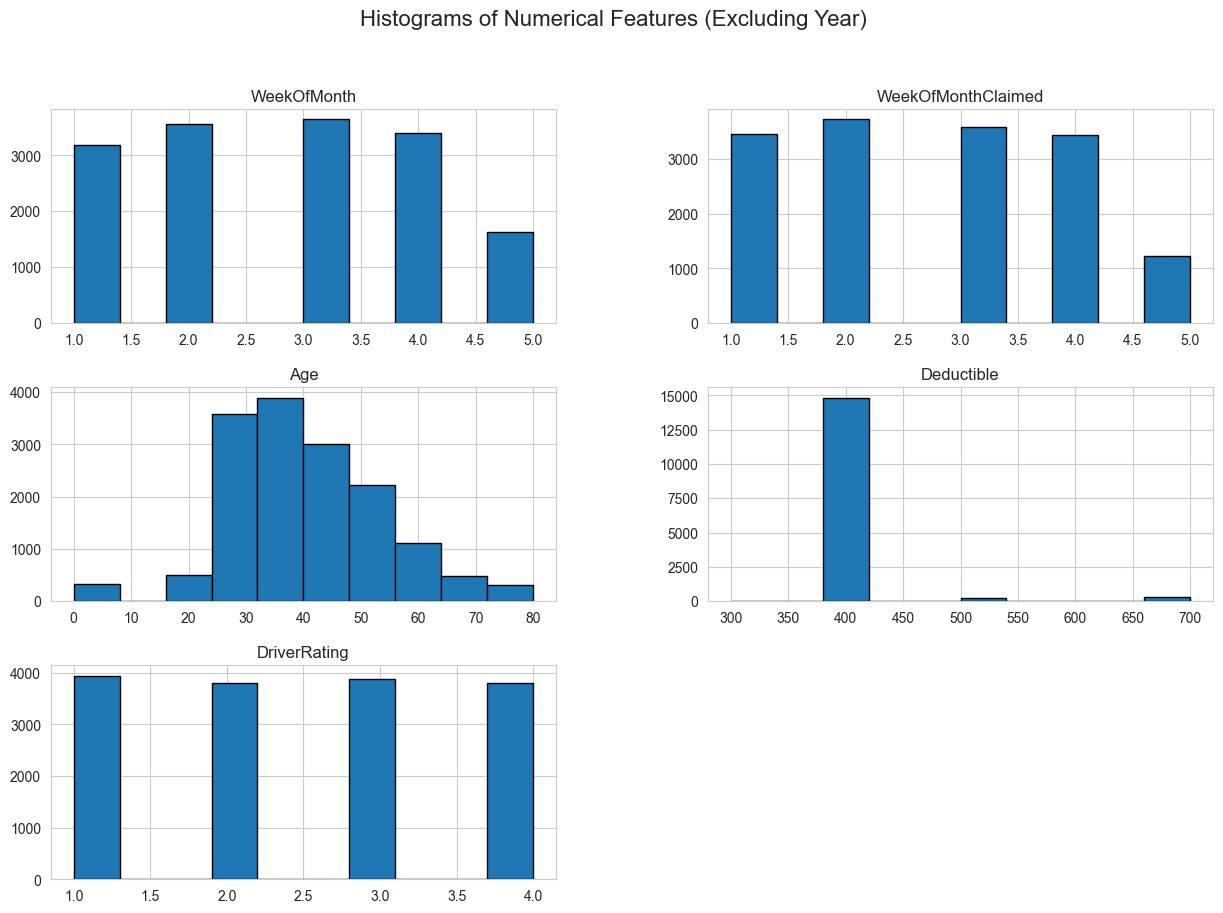

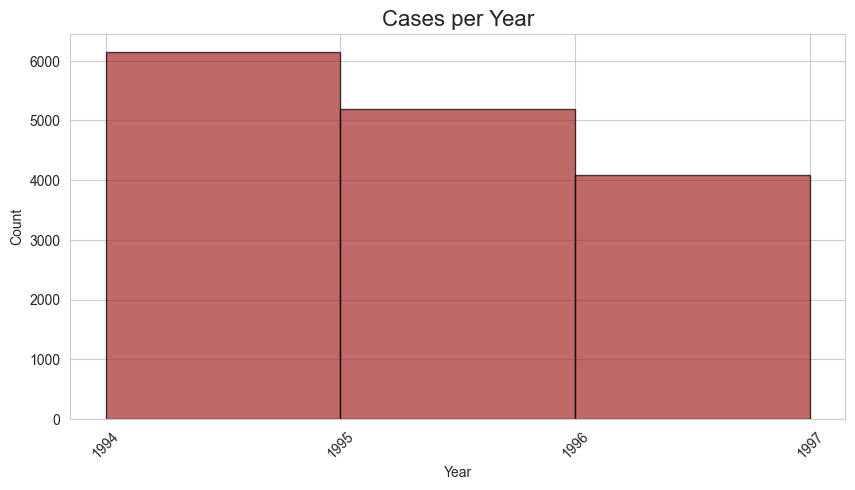

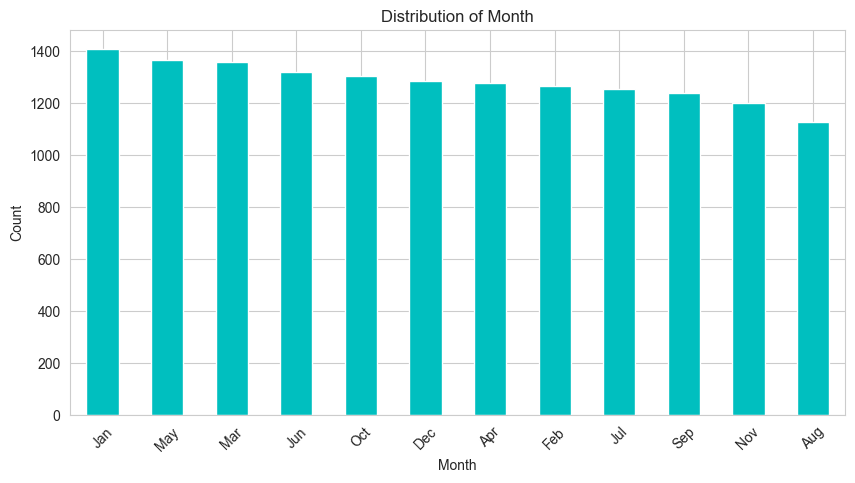

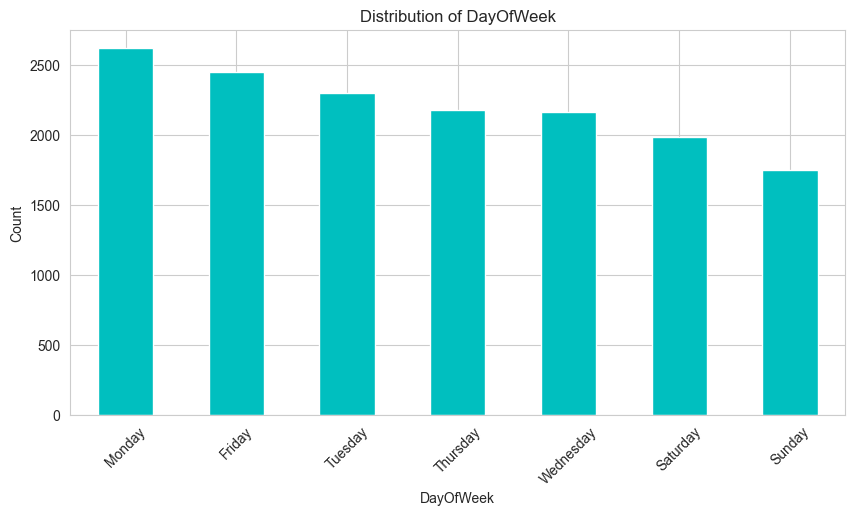

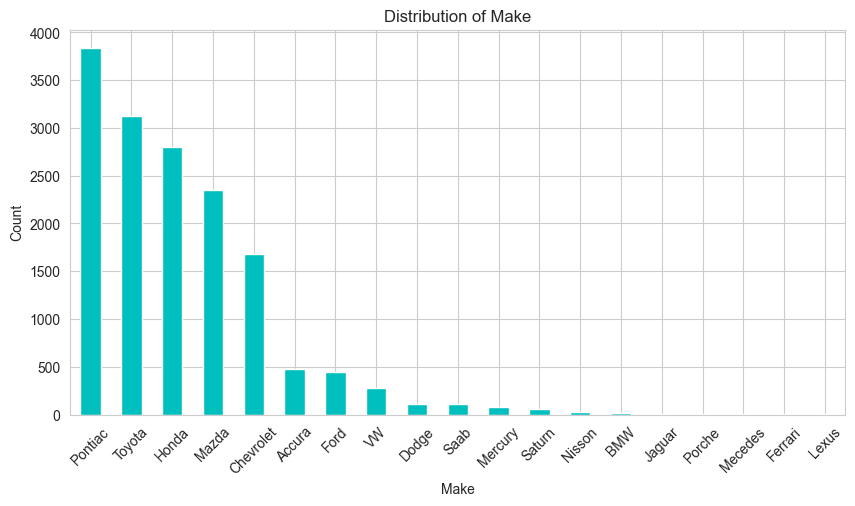

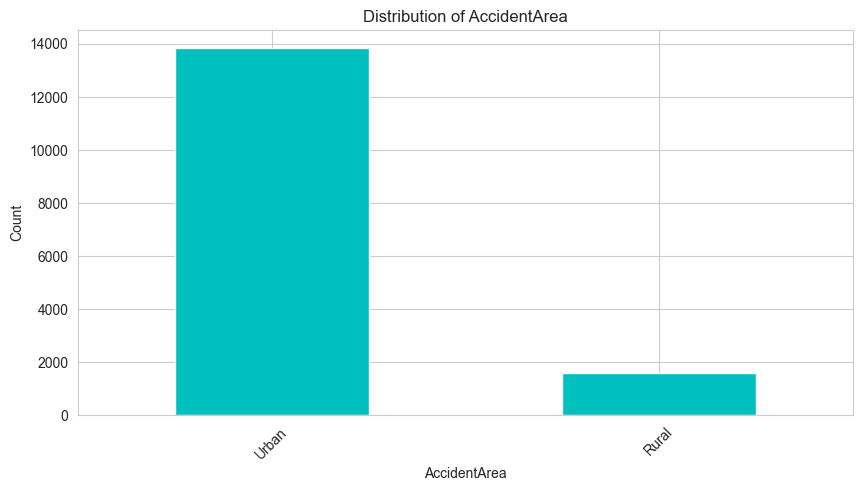

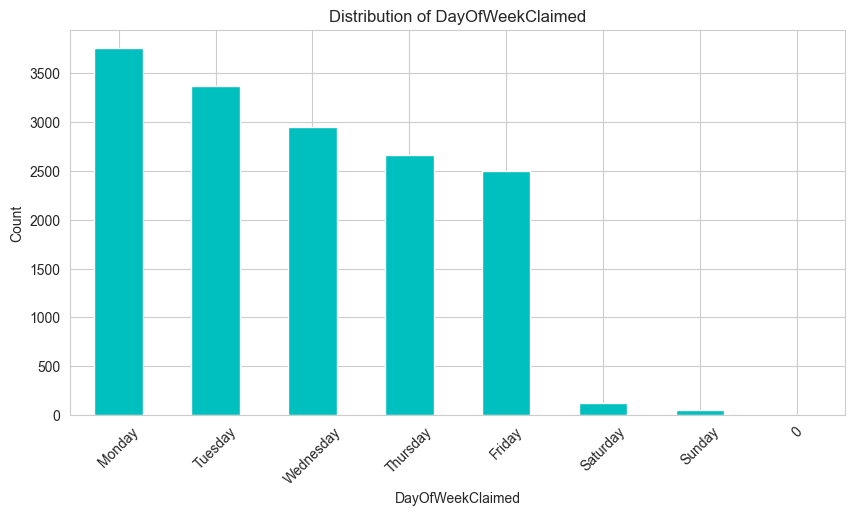

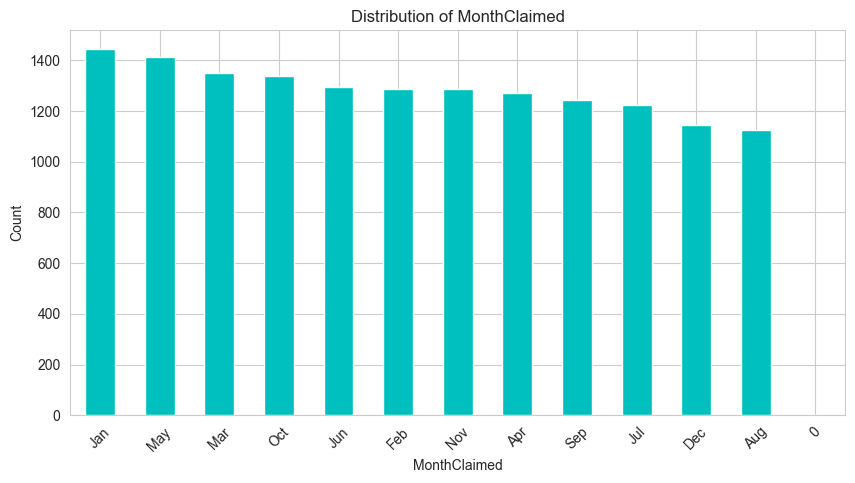

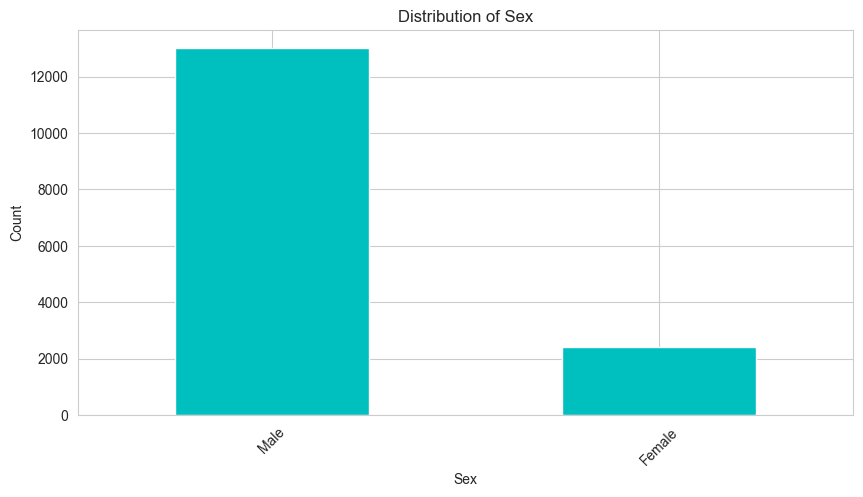

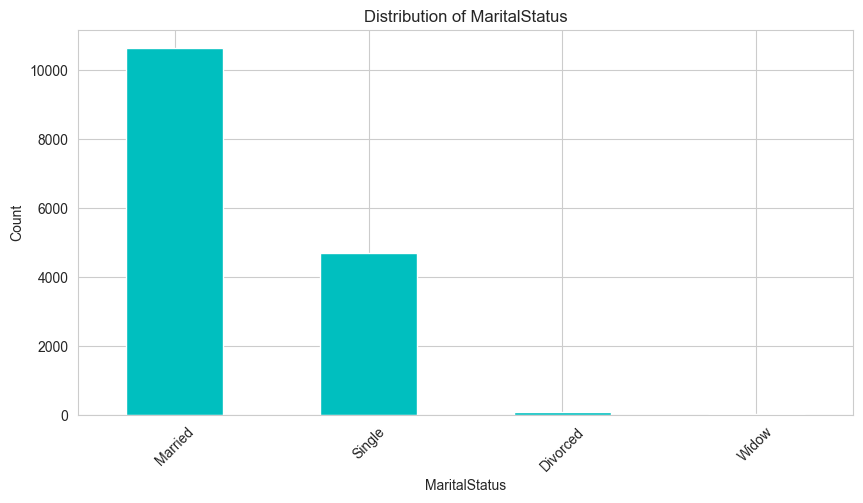

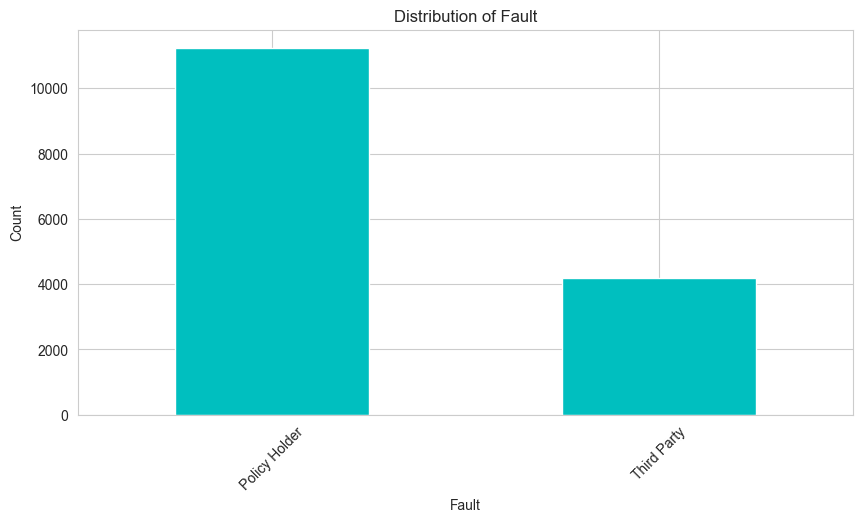

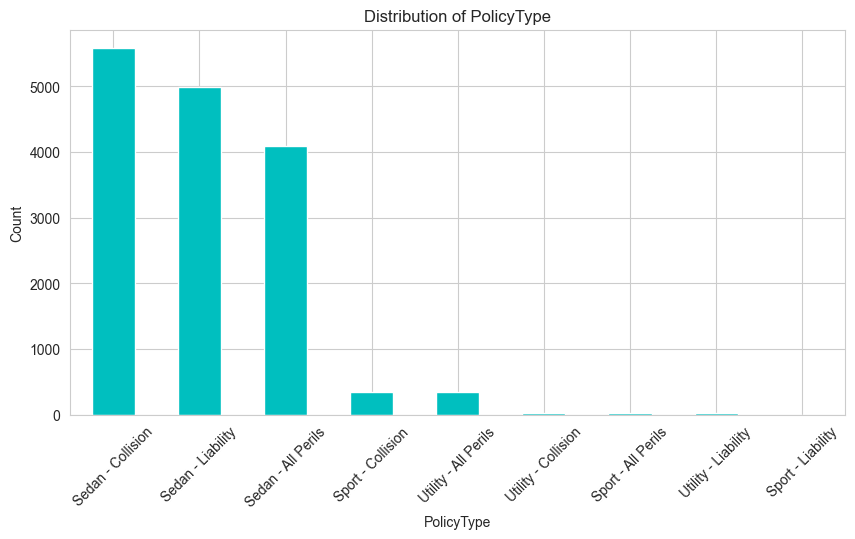

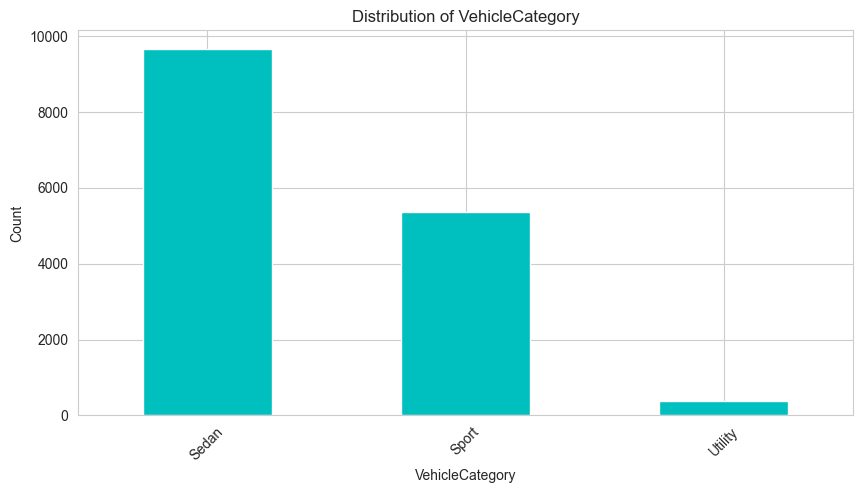

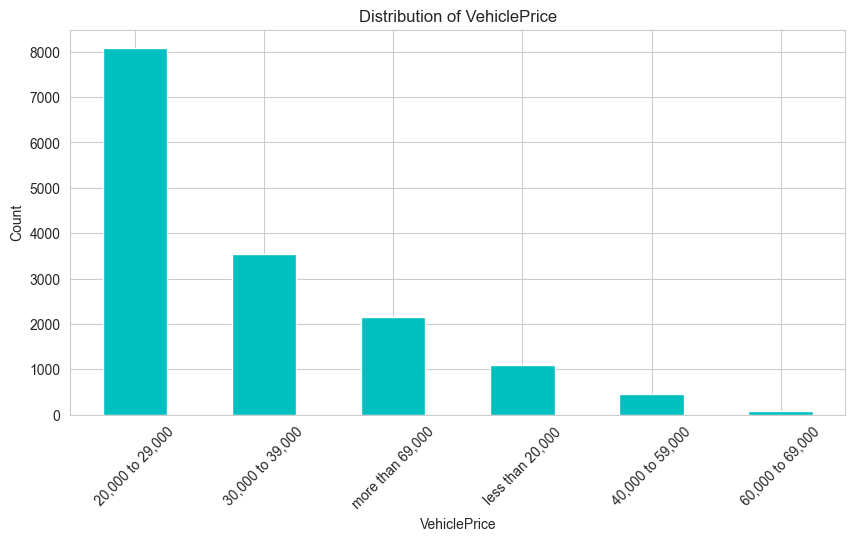

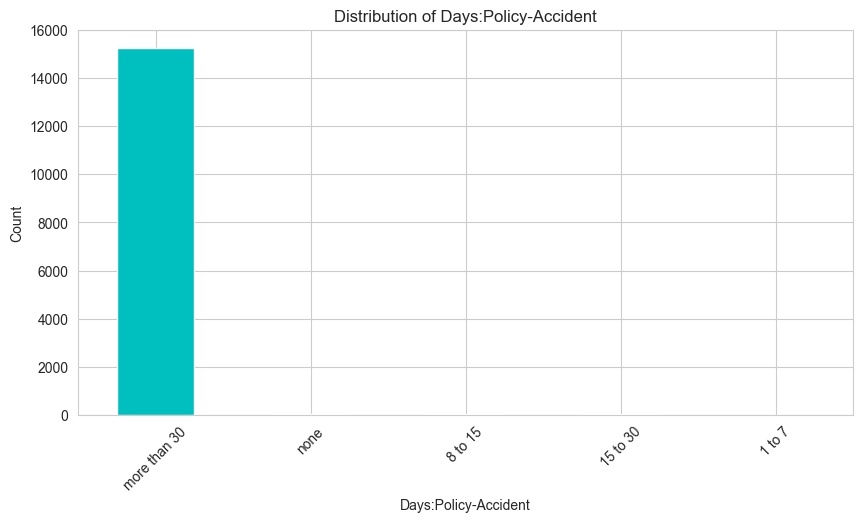

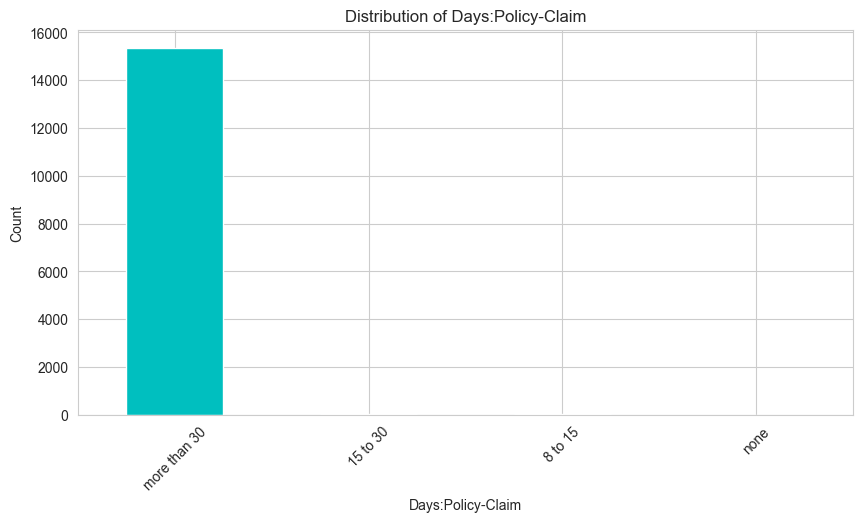

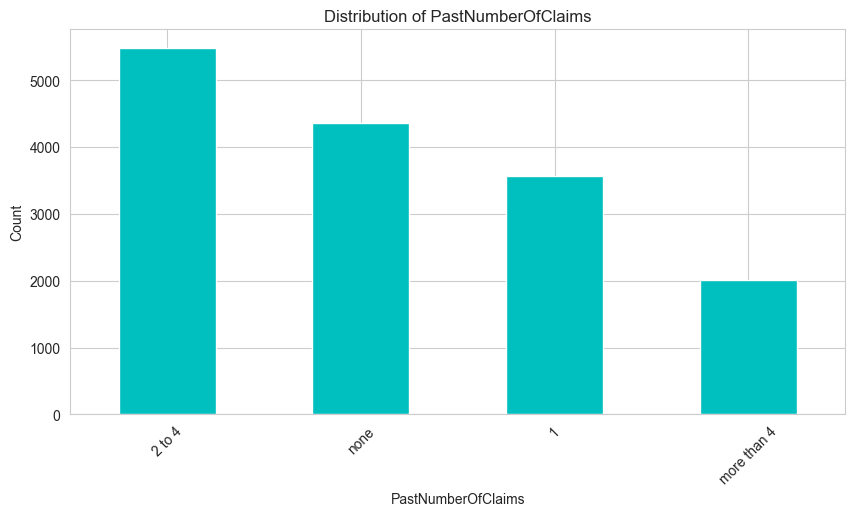

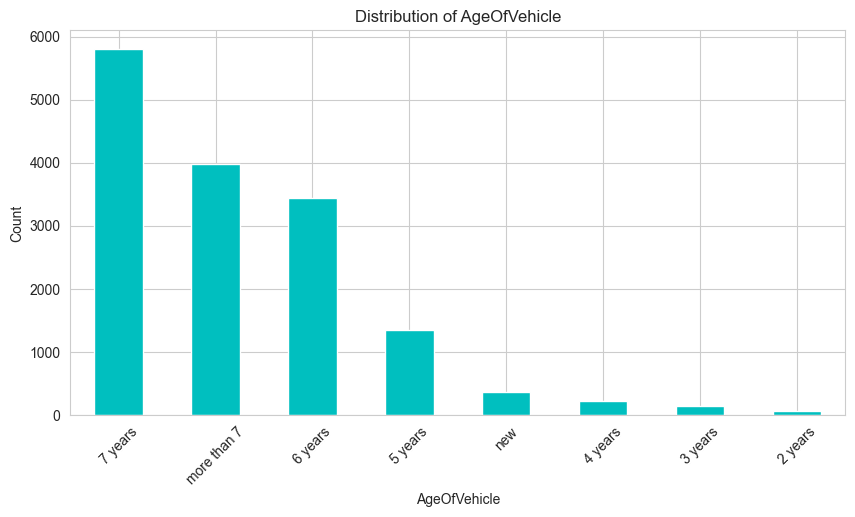

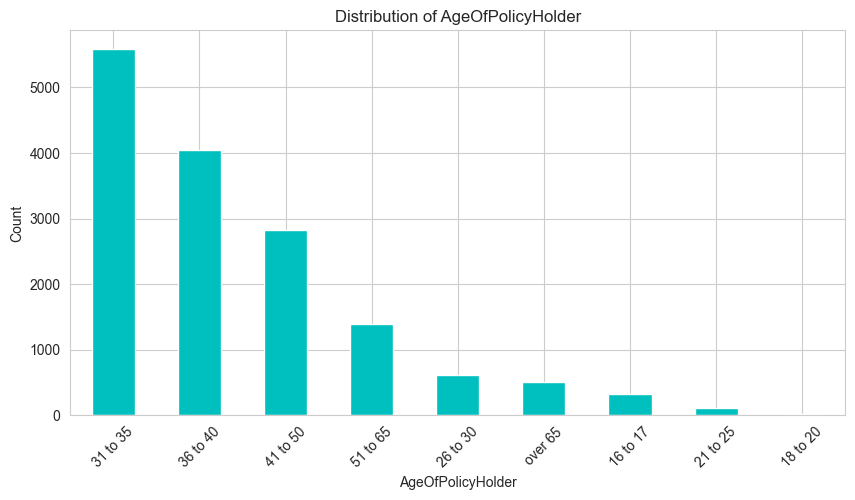

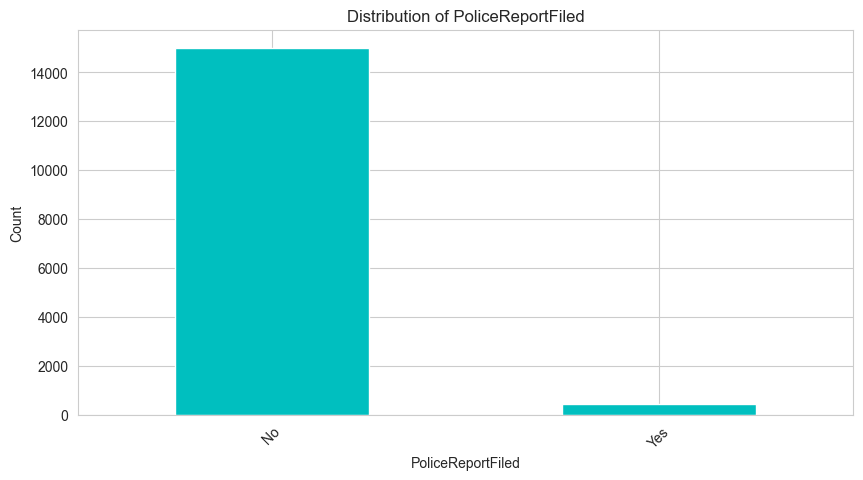

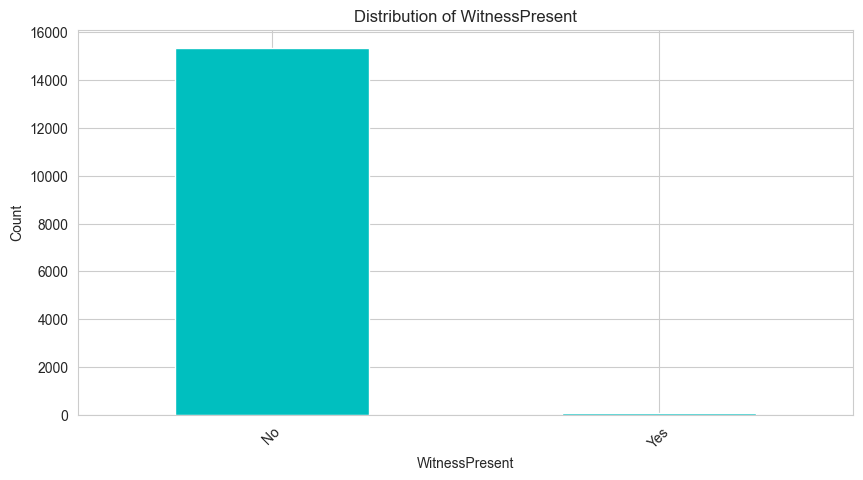

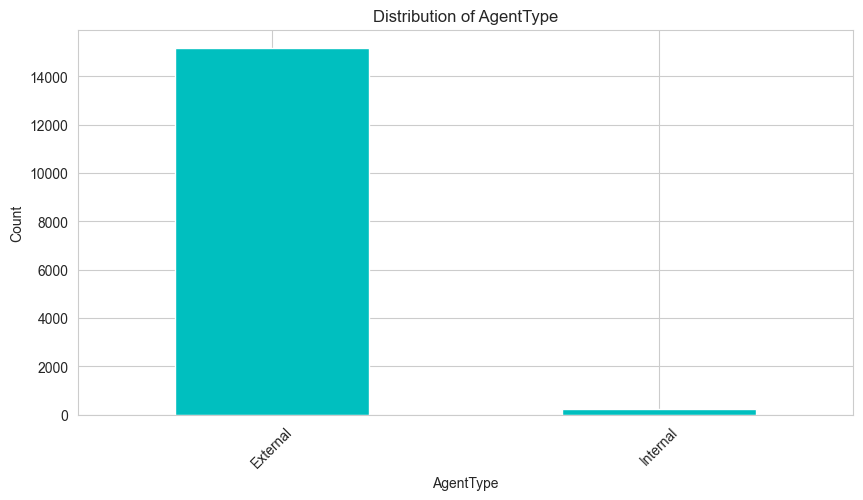

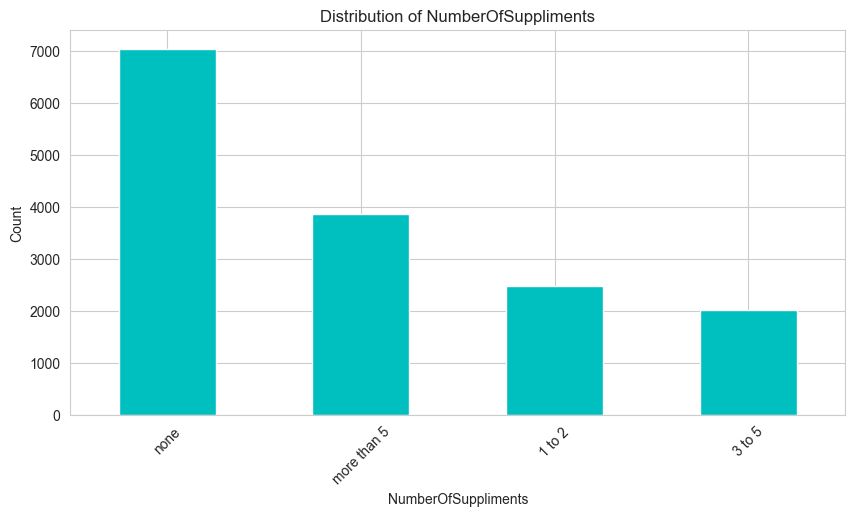

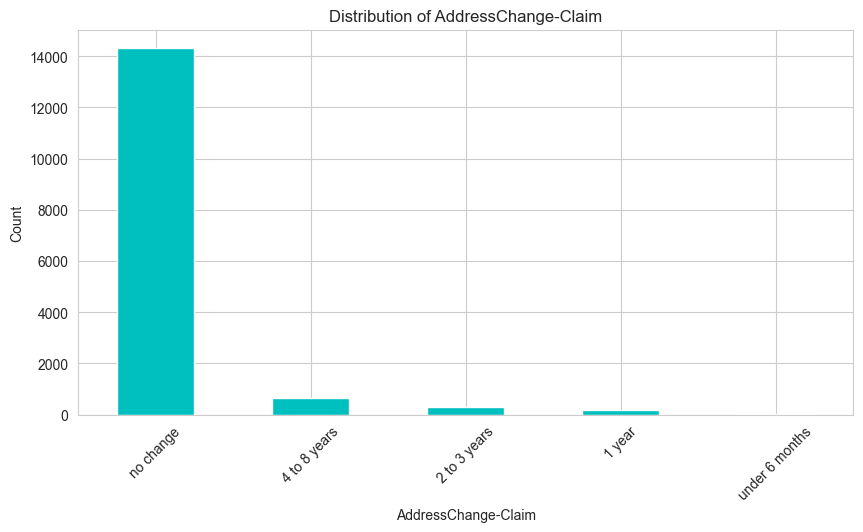

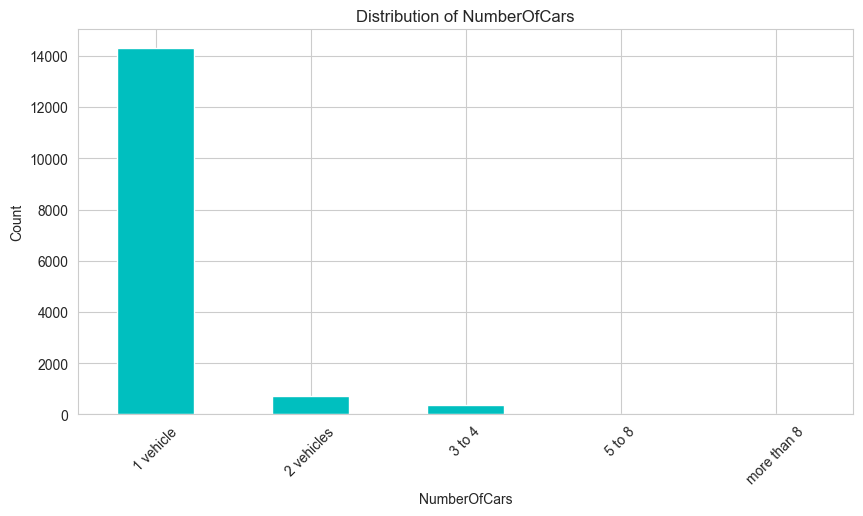

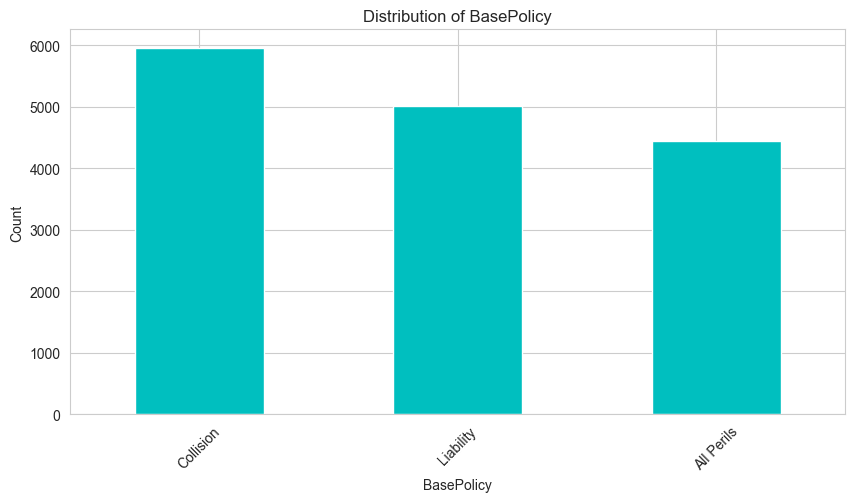

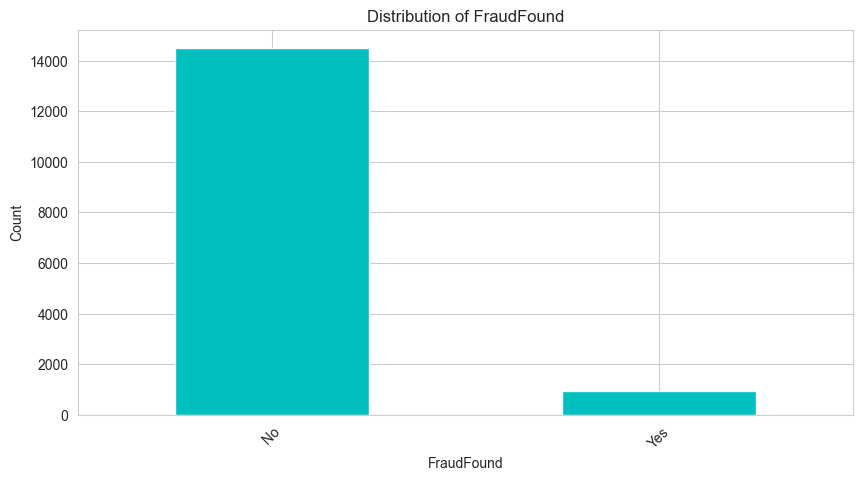

In [18]:
import matplotlib.pyplot as plt
import numpy as np

#we have to separate numerical and categorical data to plot them correct
#BIG NOTE - I had help to sort out the year column and the numerical data from chat gpt. I didn't like how cases per year appeared and I couldn't find a solution. 

#identify numeric columns
numerical_cols = car_claims.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

#get numerical data and drop policy and rep number
numerical_data = car_claims.select_dtypes(include=['int64', 'float64'])
numerical_data = numerical_data.drop(columns=['PolicyNumber', 'RepNumber'], errors='ignore')

#handle year column
if 'Year' in numerical_data.columns:
    #cast year as int
    car_claims['Year'] = car_claims['Year'].astype(int)
    year_data = numerical_data['Year']
    numerical_data = numerical_data.drop(columns=['Year'])
else:
    year_data = None

# plot the histograms of numerical features 
numerical_data.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.suptitle("Histograms of Numerical Features (Excluding Year)", fontsize=16)
plt.show()

#this is to handle the year column below to make it readable
if year_data is not None:
    min_year, max_year = year_data.min(), year_data.max()
    # arange from min to max+1 to make integer-width bins
    bins = np.arange(min_year, max_year + 2) 
    
    #plot the histogram for the year column
    plt.figure(figsize=(10,5))
    plt.hist(year_data, bins=bins, edgecolor='black', color='brown', alpha=0.7)
    plt.title("Cases per Year", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(bins, rotation=45)  # Show each year on the x-axis
    plt.show()

#finally, plot categorical columns as before
categorical_cols = car_claims.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    car_claims[col].value_counts().plot(kind='bar', color='c')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

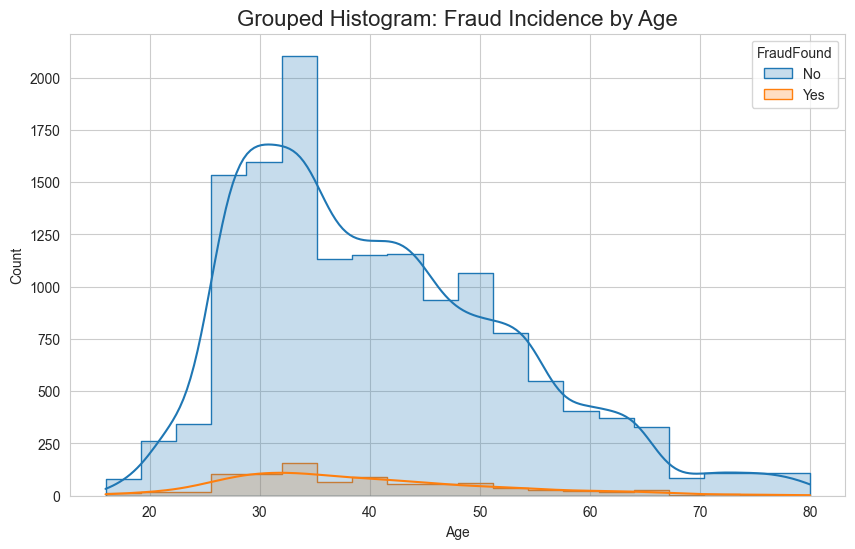

In [19]:


# I'm not seeing a lot of useful information here. We can say that there are more claims in general from Ages 25-50.  
# It looks like there are more accident claims from 25-30 and even more from 32-35 and as such there are more both fraudulent and honest claims in that age range. 

#ensure FraudFound is categorical
car_claims["FraudFound"] = car_claims["FraudFound"].astype(str)
car_claims = car_claims[car_claims["Age"] > 0]

#set figure size
plt.figure(figsize=(10, 6))

#create grouped histogram
import seaborn as sns
sns.histplot(data=car_claims, x="Age", hue="FraudFound", bins=20, kde=True, element="step", stat="count")


#add title and labels
plt.title("Grouped Histogram: Fraud Incidence by Age", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Count")
#plt.legend(title="Fraud Count", loc="upper right")

#show the plot
plt.show()

<Axes: xlabel='Fault', ylabel='Age'>

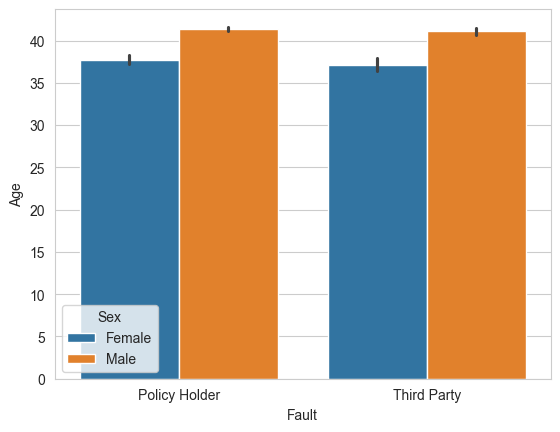

In [20]:
# If we want to break down the claims by Fault and Sex and show it by age, we see
# males tend to be slightly older than females in both cases of policy holder and thirdp party
# But age distibution doesn't vary much by fault type.

import seaborn as sns
sns.barplot(x="Fault", y="Age", hue="Sex", data=car_claims)


<Axes: xlabel='FraudFound', ylabel='Age'>

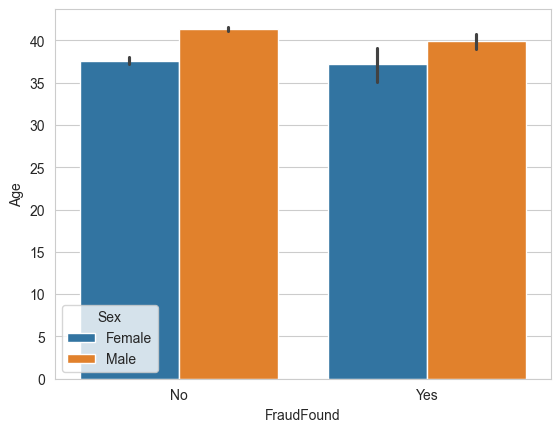

In [21]:
# If we want to break down the claims by Fault and Sex and show it by age.

import seaborn as sns
sns.barplot(x="FraudFound", y="Age", hue="Sex", data=car_claims)


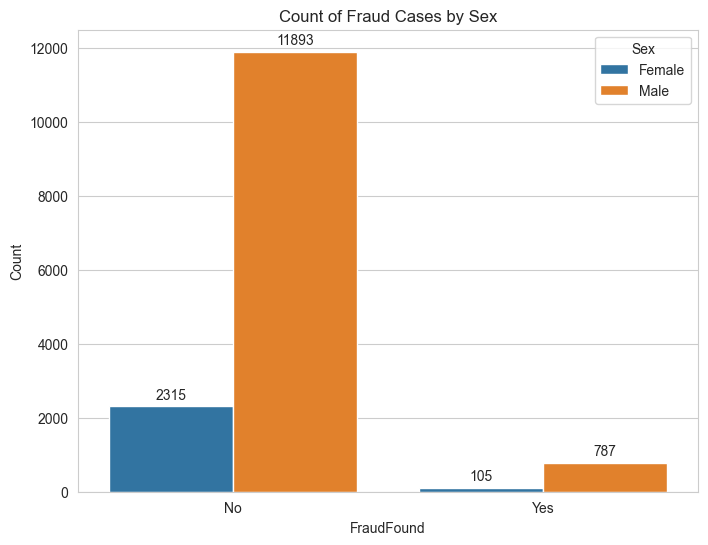

In [22]:
# We can see that males not only have more claims, but more fraudulent claims - this is in total numbers
# But the total male-to-female claim ratio of both fraudulent and honest claims is 6-7 times to one. This tells us that males file more claims in general..
#..and this is not a good indicator of fraud.  

#create the plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="FraudFound", hue="Sex", data=car_claims)

#get counts at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

#title and lqable
plt.title("Count of Fraud Cases by Sex")
plt.xlabel("FraudFound")
plt.ylabel("Count")

#do the show
plt.show()


In [23]:
#To see the bar counts, I need to get them concpetually together...
# To to this, I want to group the features into cateogies that make sense. Car features, driver features, accident features and claim process features.

# Car-Related Features
car_features = car_claims[["Make", "VehicleCategory", "VehiclePrice", "AgeOfVehicle"]]

# Driver-Related Features
driver_features = car_claims[["Sex", "MaritalStatus", "Age", "AgeOfPolicyHolder", "DriverRating"]]

# Accident-Related Features
accident_features = car_claims[["AccidentArea", "Fault", "PoliceReportFiled", "WitnessPresent",
                                "Days:Policy-Accident", "Days:Policy-Claim", "WeekOfMonth", "DayOfWeek", "Year"]]

# Claim-Related Features - I'm treating RepNumber as a feature as there are 16 of them and they could be colluding in the fraud "RepNumber"
claim_features = car_claims[["PolicyType", "Deductible", "PastNumberOfClaims", "NumberOfSuppliments", "NumberOfCars",
                             "AddressChange-Claim", "WeekOfMonthClaimed", "DayOfWeekClaimed",
                             "MonthClaimed","AgentType", "BasePolicy"]]


# I'm was going to treat RepNumber as a feature as there are 16 of them and they could be colluding in the fraud. RepNumber could be considered a unique identifier and those aren't usually used as features, but I was curious if there is a pattern. Anyway, I looked at the distribution and saw no patterns and decided against it.


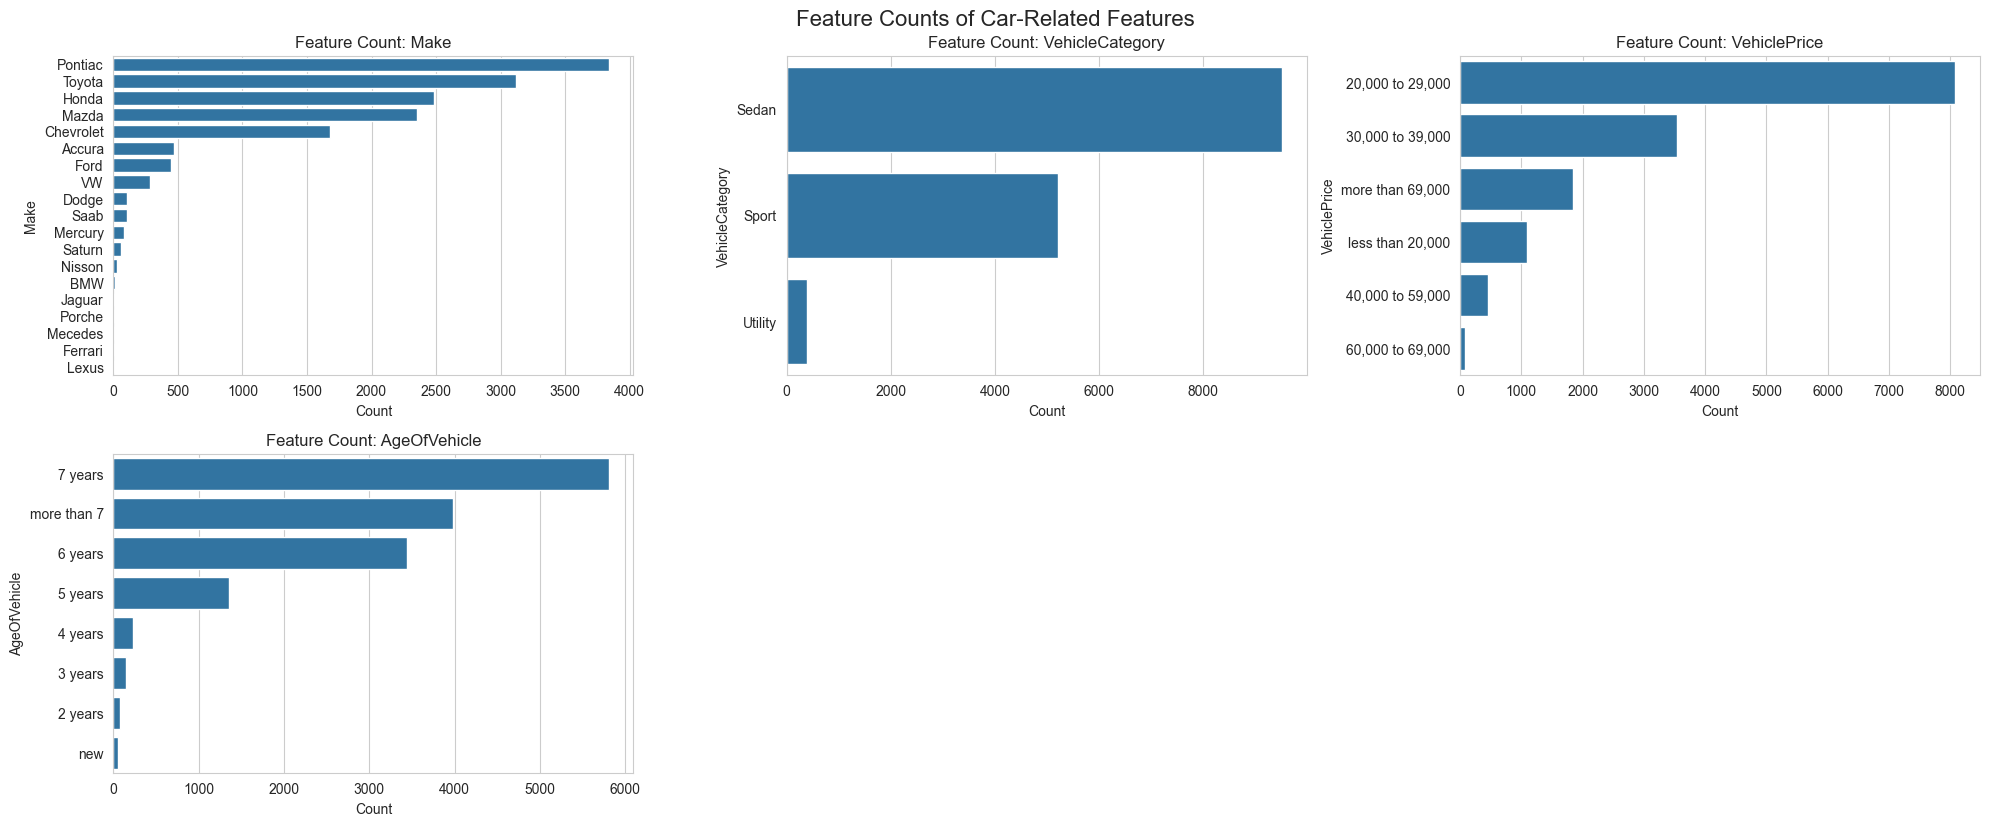

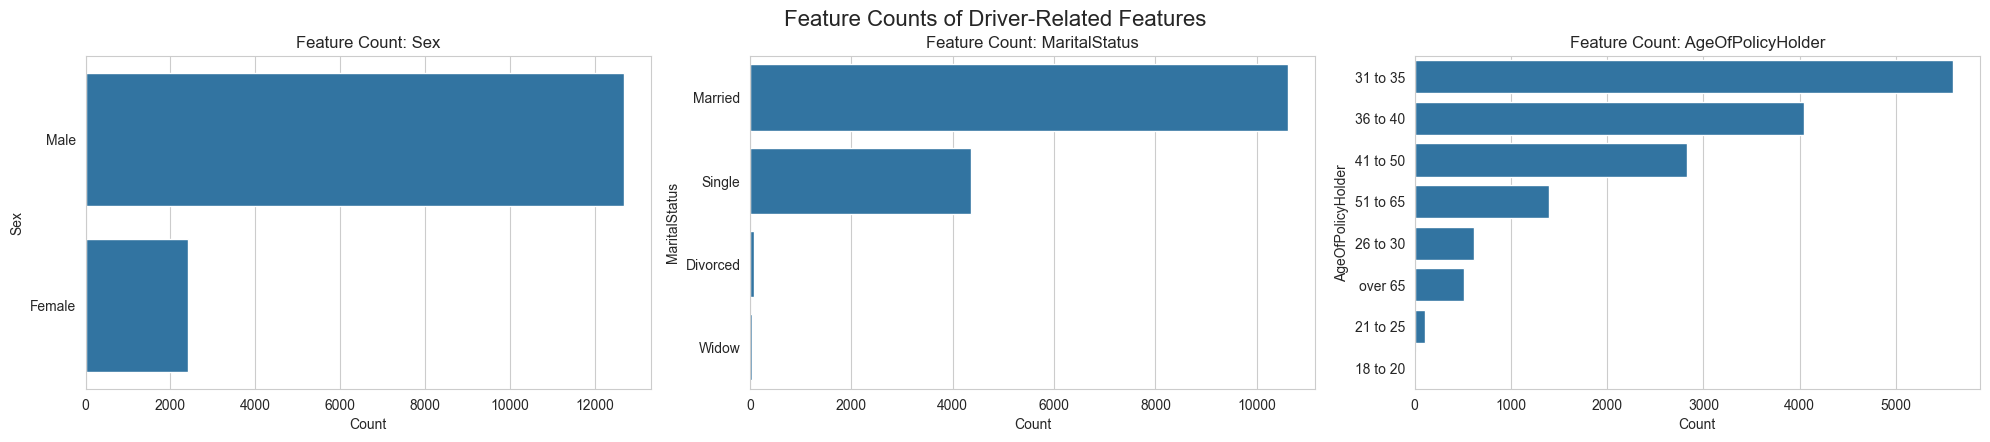

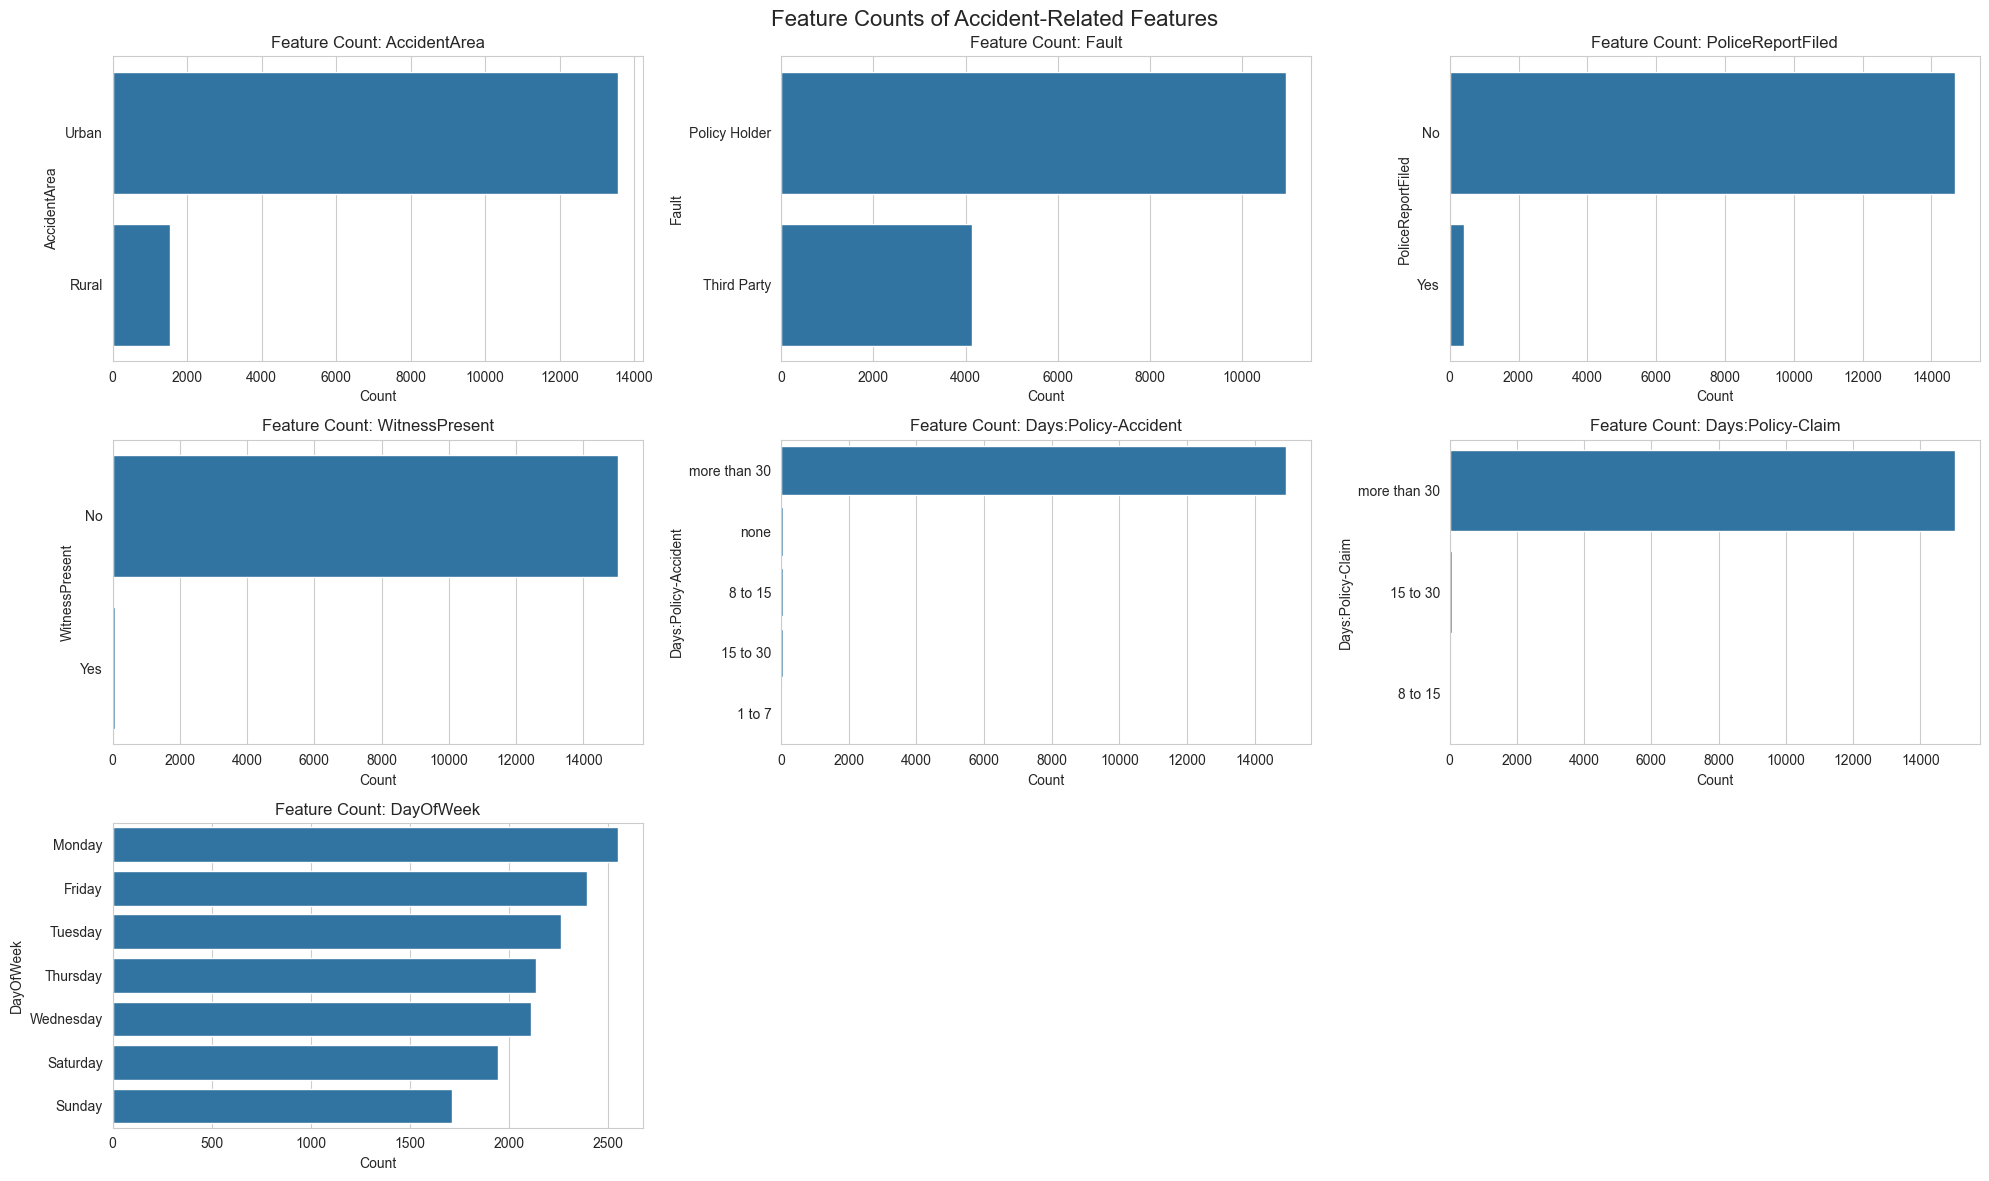

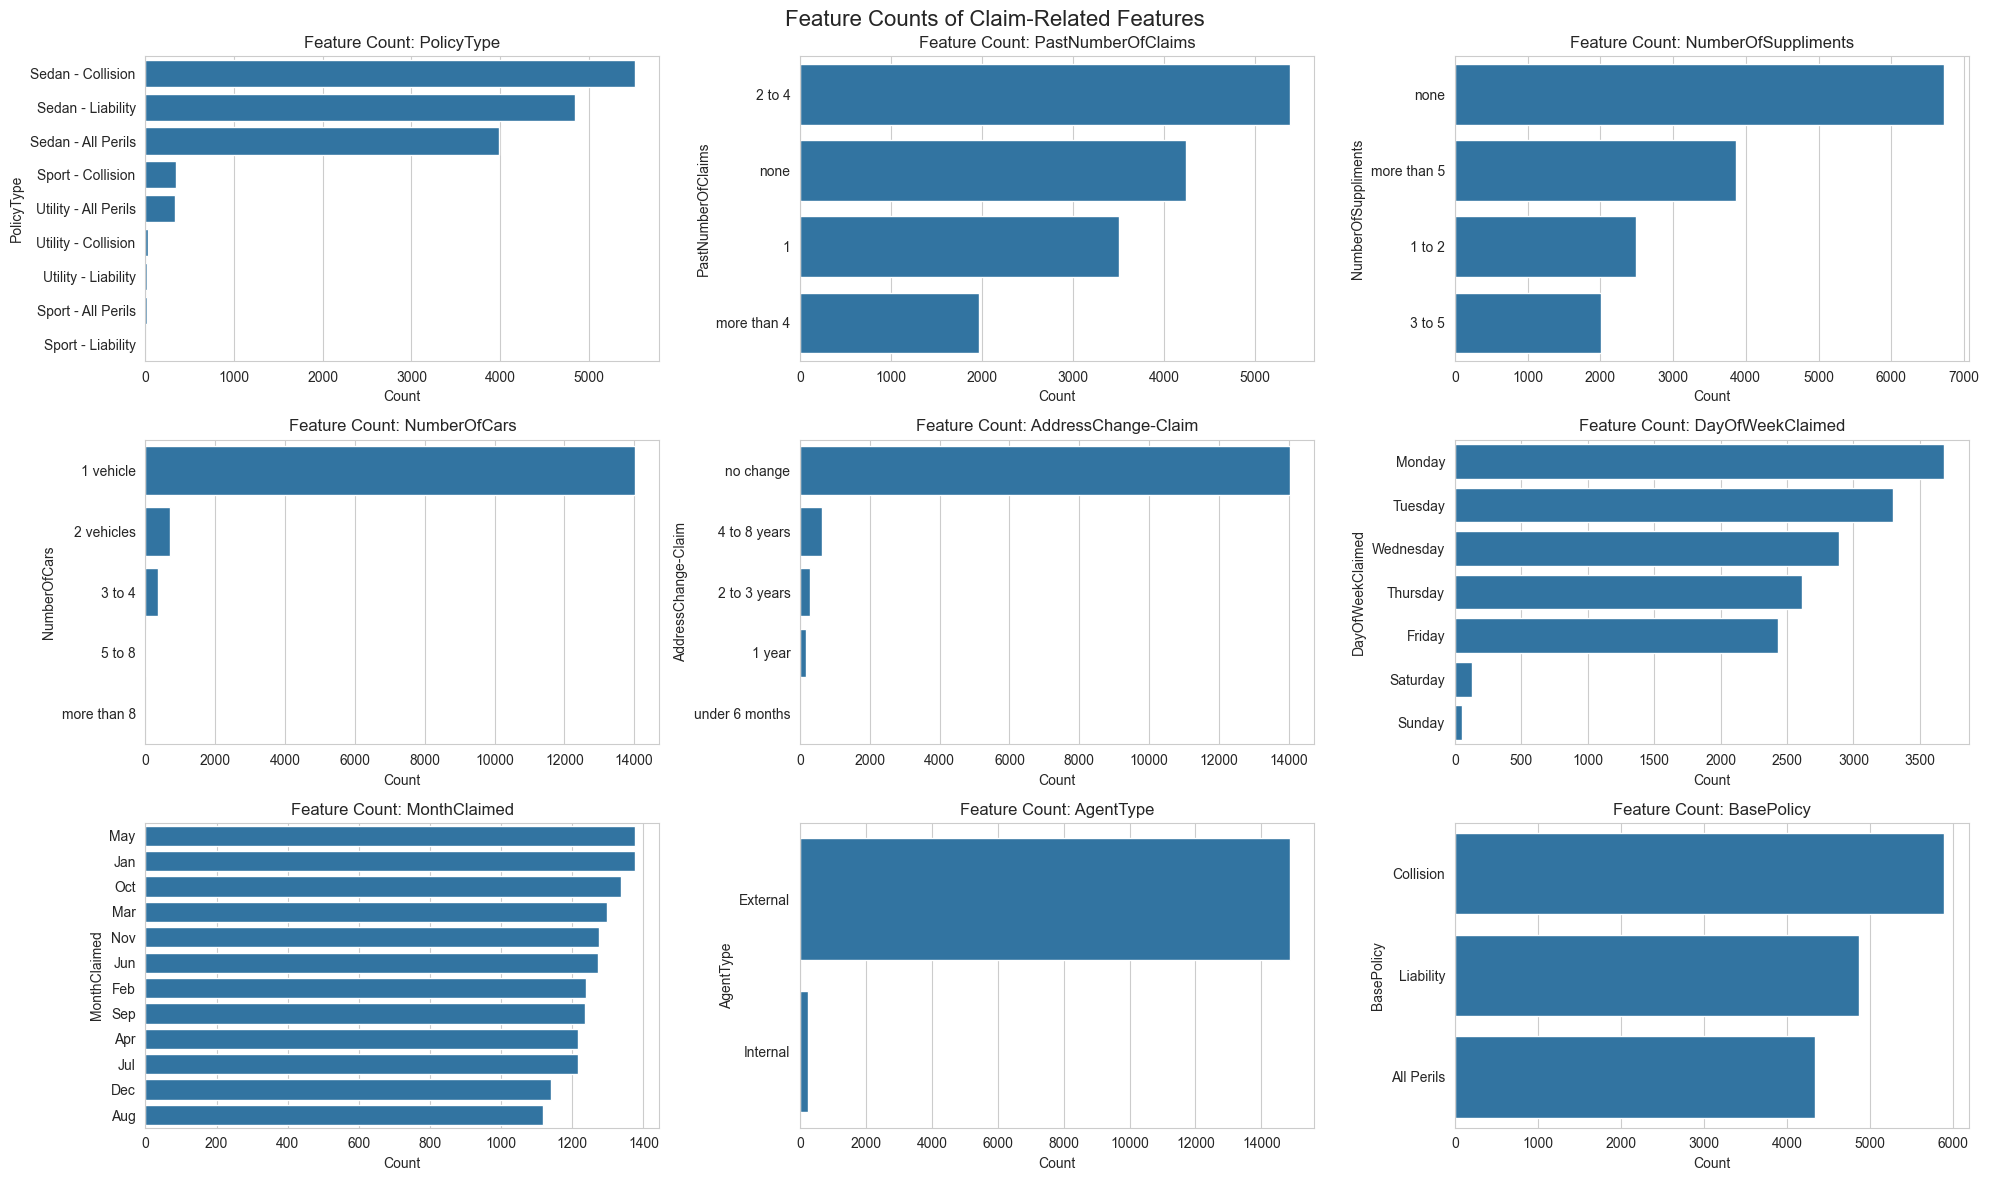

In [24]:
##3. Bar Plot of Feature Counts
# 
# Define a function to count occurrences of categorical features in each group
def plot_feature_counts(dataframe, title):
    # Select only categorical columns for count plots
    categorical_data = dataframe.select_dtypes(include=["object"])
    
    if not categorical_data.empty:
        plt.figure(figsize=(20, 12))
        for i, column in enumerate(categorical_data.columns, 1):
            plt.subplot(3, 3, i)  # Create a grid for subplots
            #sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index, palette="viridis")
            sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index)
            plt.title(f"Feature Count: {column}")
            plt.xlabel("Count")
            plt.ylabel(column)
        
        plt.suptitle(f"Feature Counts of {title}", fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No categorical features in {title} for count plot.")

# Generate feature count plots for each feature group
plot_feature_counts(car_features, "Car-Related Features")
plot_feature_counts(driver_features, "Driver-Related Features")
plot_feature_counts(accident_features, "Accident-Related Features")
plot_feature_counts(claim_features, "Claim-Related Features")

In [25]:
#4. Means, medians, and modes
#as instructed. I got the numerical data previously above for the histograms. 

# Computing mean, median, and mode for numerical columns
means = numerical_data.mean()
medians = numerical_data.median()
modes = numerical_data.mode().iloc[0]  # Taking the first mode

# Creating a summary DataFrame
summary_stats = pd.DataFrame({'Mean': means, 'Median': medians, 'Mode': modes})

summary_stats


,Mean,Median,Mode
WeekOfMonth,2.788586,3.0,3
WeekOfMonthClaimed,2.693969,3.0,2
Age,39.855707,38.0,30
Deductible,407.704280,400.0,400
DriverRating,2.487808,2.0,1


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

C:\Users\james\AppData\Local\Temp\ipykernel_9520\277738855.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["Period"], rotation=45)


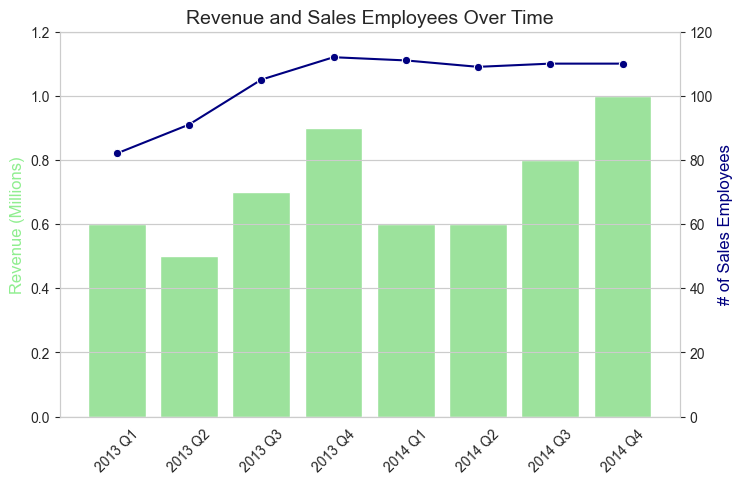

In [26]:
# I'm using the sales vs sales agents on pg 68. It took a bit of playing with the two y-axes to get it to work. But I think I have got a good version. I also changed the bars to light green for visibility. 
#get data in df
data = {
    "Quarter": ["Q1", "Q2", "Q3", "Q4", "Q1", "Q2", "Q3", "Q4"],
    "Year": [2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014],
    "Revenue": [0.6, 0.5, 0.7, 0.9, 0.6, 0.6, 0.8, 1.0],
    "Sales Employees": [82, 91, 105, 112, 111, 109, 110, 110]
}

df = pd.DataFrame(data)

#we have to combine the year and period to make it readable
df["Period"] = df["Year"].astype(str) + " " + df["Quarter"]

#set the figure style
sns.set_style("whitegrid")

#create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(8, 5))

#let's use light color for visibility
color_bar = "lightgreen"
sns.barplot(x="Period", y="Revenue", data=df, color=color_bar, ax=ax1)

#secondary y-axis for sales employees
ax2 = ax1.twinx()
color_line = "navy"
sns.lineplot(x="Period", y="Sales Employees", data=df, marker="o", color=color_line, ax=ax2)

#played with these to get it to look right
ax1.set_ylim(0, 1.2)
ax2.set_ylim(0, 120)

#labes and titles
ax1.set_xlabel("")
ax1.set_ylabel("Revenue (Millions)", color=color_bar, fontsize=12)
ax2.set_ylabel("# of Sales Employees", color=color_line, fontsize=12)

#rotate the labels to make it better readable
ax1.set_xticklabels(df["Period"], rotation=45)

#do the show
plt.title("Revenue and Sales Employees Over Time", fontsize=14)
plt.show()